## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [27]:
# Your code here - remember to use markdown cells for comments as well


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data/Aviation_Data.csv')

In [36]:
#Creating a list of columns that has 20%+ of null values
list(df.loc[:,df.isna().sum()/len(df) > 0.2].columns)

['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'FAR.Description',
 'Schedule',
 'Air.carrier',
 'Broad.phase.of.flight']

In [ ]:
# Event.Id
# Investigation.Type
# Accident.Number
# Event.Date
# Location
# Country
# Injury.Severity
# Aircraft.damage
# Registration.Number 
# Make #keep, maybe use to engineer a new feature using LLM 
# Model #keep, maybe use to engineer a new feature using LLM 
# Amateur.Built #keep: few nan (1.5k) vals, most are not amateur built (80k)
# Number.of.Engines #keep: few NAN values (7.5k), most are have 1 (70k)
# Engine.Type #keep, few unknown (2k) and nan vals (8.5k), most are reciprocating (70k)
# Purpose.of.flight #keep: few unknown (6.8k) and nan (7.6k) vals, most are personal (50k)
# Total.Fatal.Injuries #keep
# Total.Serious.Injuries #keep
# Total.Minor.Injuries #keep
# Total.Uninjured #keep
# Weather.Condition #keep, mostly split between low and high visibility 
# Report.Status #DROP, about 70k are probable cause or nan 
# Publication.Date #DROP, less important than event date; also, skewed towards 2020

In [ ]:
"""Actions to take with the null values per column:
Event.Id                  0.016149
Investigation.Type        0.000000 DROP
Accident.Number           0.016149
Event.Date                0.016149
Location                  0.016724
Country                   0.018650
Latitude                  0.619449  DROP COLUMN
Longitude                 0.619549 DROP COLUMN
Airport.Code              0.443828
Airport.Name              0.415704
Injury.Severity           0.027217
Aircraft.damage           0.051501
Aircraft.Category         0.642637
Registration.Number       0.030726 
Make                      0.016846 DROP
Model                     0.017167 DROP
Amateur.Built             0.017278 
Number.of.Engines         0.083488
Engine.Type               0.094479
FAR.Description           0.645559
Schedule                  0.860738
Purpose.of.flight         0.084684
Air.carrier               0.815735
Total.Fatal.Injuries      0.142339
Total.Serious.Injuries    0.154613
Total.Minor.Injuries      0.148227
Total.Uninjured           0.081585
Weather.Condition         0.065868
Broad.phase.of.flight     0.316819
Report.Status             0.086776 DROP
Publication.Date          0.184719
"""

In [ ]:
"""
['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Injury.Severity',
 'Aircraft.damage',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'Purpose.of.flight',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Report.Status',
 'Publication.Date']"""

In [38]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [43]:
#Working on reporting status
df['Report.Status'].nunique()

17007

In [48]:
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category             0
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [49]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [31]:
df.isna().sum()/len(df)

Event.Id                  0.016149
Investigation.Type        0.000000
Accident.Number           0.016149
Event.Date                0.016149
Location                  0.016724
Country                   0.018650
Latitude                  0.619449
Longitude                 0.619549
Airport.Code              0.443828
Airport.Name              0.415704
Injury.Severity           0.027217
Aircraft.damage           0.051501
Aircraft.Category         0.642637
Registration.Number       0.030726
Make                      0.016846
Model                     0.017167
Amateur.Built             0.017278
Number.of.Engines         0.083488
Engine.Type               0.094479
FAR.Description           0.645559
Schedule                  0.860738
Purpose.of.flight         0.084684
Air.carrier               0.815735
Total.Fatal.Injuries      0.142339
Total.Serious.Injuries    0.154613
Total.Minor.Injuries      0.148227
Total.Uninjured           0.081585
Weather.Condition         0.065868
Broad.phase.of.fligh

In [32]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [33]:
df['FAR.Description'].value_counts(dropna=False)

NaN                               58325
091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5


In [35]:
# We're going to ignore the Aircraft.Category for now, 
#then check correlations of unknowns with the ones from aircrafts
#We replace the null values on the aircraft category for "Unknown" to don't discard the type completely
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown')

In [22]:
df['Schedule'].value_counts(dropna=False)

NaN     77766
NSCH     4474
UNK      4099
SCHD     4009
Name: Schedule, dtype: int64

In [26]:
df['Aircraft.Category'].value_counts(dropna=False)

NaN                  58061
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [45]:
df['Broad.phase.of.flight'].value_counts(dropna=False)

NaN            28624
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [60]:
new_df = df[['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Injury.Severity','Aircraft.damage']].copy()
new_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed
...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN


In [ ]:
'''Event.Id              1459 DROP COLUMN
Investigation.Type       0  DROP COLUMN
Accident.Number       1459 DROP COLUMN
Event.Date            1459 CHANGE TO EVENT YEAR 
Location              1511
Country               1685 US - NON US
Injury.Severity       2459 DROP COLUMN
Aircraft.damage       4653'''

In [133]:
#df['Injury.Severity'].value_counts(dropna=False, normalize=True)
df_fatal = df.loc[df['Injury.Severity'] != 'Non-Fatal']
df_fatal2 = df.loc[df['Injury.Severity'] == 'Fatal(2)']


In [139]:
new_df.loc[[((new_df['Country'] != ('United States')) | (new_df['Country'] != 'NaN'))].replace(,'NON-US')]
new_df.value_counts()

SyntaxError: invalid syntax (<ipython-input-139-d2f7a8e2dfd4>, line 1)

In [138]:
new_df['Country'].value_counts()

United States               82248
Brazil                        374
Canada                        359
Mexico                        358
United Kingdom                344
                            ...  
Albania                         1
AY                              1
Sierra Leone                    1
Turks and Caicos Islands        1
Ivory Coast                     1
Name: Country, Length: 219, dtype: int64

In [90]:
new_df = new_df[new_df['Event.Date'].notnull()]
new_df['Event.Date'].isna().sum()
#df = df[df.line_race.notnull()]

0

In [119]:
# new_df['Event.Year'] = df['Event.Date'].apply(lambda x: int(str(x)[:4]))
# new_df['Event.Year'].isna().sum()
new_df['Event.Year'] = df['Event.Date'].apply(lambda x: str(x)[:4])
new_df

ValueError: invalid literal for int() with base 10: 'nan'

In [116]:
new_df['Event.Year'] = new_df['Event.Year'].apply(lambda x: int(x))

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

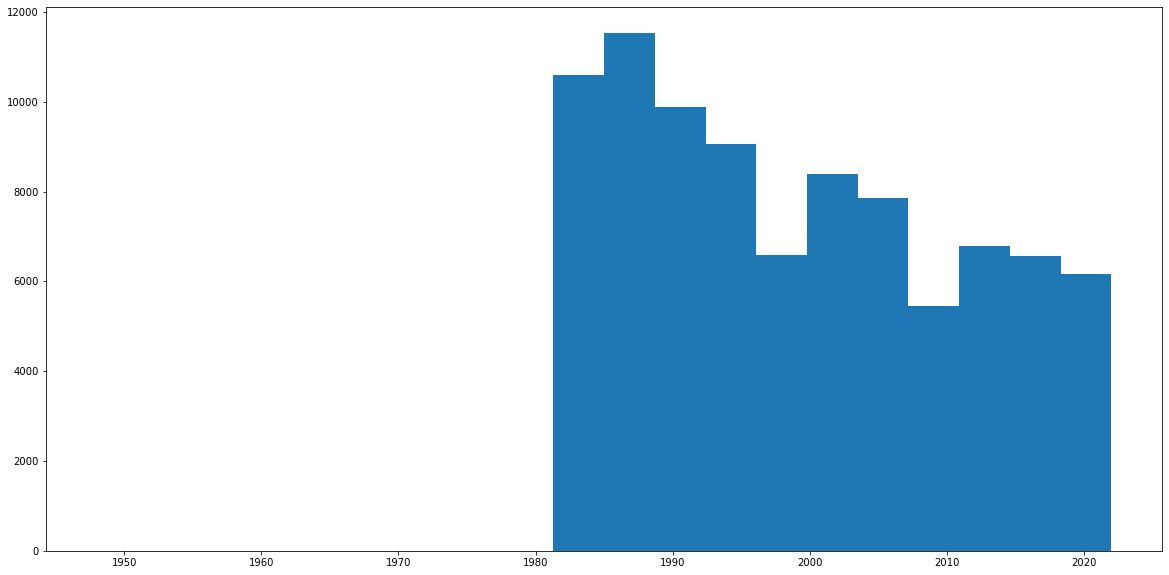

In [118]:
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(new_df['Event.Year'], bins=20);